以下會針對scikit-learn套件中提到之三種方法：SVC、NuSVC以及LinearSVC進行說明 <br>
先進行簡單說明：<br>
1. 三種方法都能進行二分類以及多分類之問題<br>
2. SVC、NuSVC方法類似，但是使用之參數以及模型有些微差異<br>
3. LinearSVC 使用linear kernel，沒有kernel之參數，也無法像其他兩方法一樣把support vector的index取出。

# 介紹

在軟邊界(soft margin)問題當中，我們處理以下問題：<br>
給定每一筆訓練資料$x_i\in \mathbb{R}^p$, $i=1,...,n$ <br>
類別變數 $y \in \{-1,1\}$ <br>

# 目標：<br>
找出權重$w\in \mathbb{R}^p$ 以及截距項$b$ 之後，我們透過<br>
$$ sign(w^T\phi(x_i)+b) $$ 來分類的結果對於$\textbf{大多數樣本}$是正確的

在SVC (support vector classification) 當中，我們將問題描述為以下形式：<br>
$$\begin{align*}
\min_{w,b,\xi} \,&\frac{1}{2}w^Tw + C\sum_{i=1}^{n}\xi_i   \\
\text{subject to } &y_i(w^T\phi(x_i)+b)\geq 1-\xi_i,\\
&\xi_i\geq 0 , i=1,...,n
\end{align*}$$

$\xi_i$ 控制了邊界浮動的大小，$C$ 則是正則化項。<br>
$C$大則會更懲罰$\xi_i$增加導致margin縮小的情況(也就是類別彼此之間更靠近)，因此$C$增加會使得訓練更加傾向完美的預測。

在處理優化問題時，我們常常會遇到的情況是：原先的問題不好解

此時會透過轉化問題，把問題轉換成好解的形式。<br>
雖然在這樣的情況找出的解不一定是原問題當中最好的，但是會找出差不多好的 <br>
而在滿足某些條件下，能夠得出跟原問題一樣好的解，此不多做說明。

在SVC的軟邊界問題當中，我們會把原問題轉換成以下形式：

$$\begin{align*}
\min_{\alpha} \,&\frac{1}{2}\alpha^Ty_iy_j\phi(x_i)^T\phi(x_j)\alpha - \textbf{1}^T\alpha   \\
\text{subject to } &y^T\alpha = 0,\\
&0\leq\alpha_i\leq C , i=1,...,n
\end{align*}$$

其中，我們會用$K(x_i,x_j) = \phi(x_i)^T\phi(x_j)$ 並且稱其為kernel function

原先我們打算使用$sign(w^T\phi(x_i)+b)$ 的結果來分類，而在轉換後的問題，我們變成用
$$sign\Big(\sum_{i: x_i \text{ is support vector}}y_i\alpha_iK(x_i,x) +b\Big) $$ <br>
來分類，而上述sign函數內之函數稱為$\textbf{ support function}$

# 內建kernel

以下列出scikit-learn 當中，SVC跟NuSVC內建的kernel function (註：也可以自定義kernel)

1. 線性： $<x,x'>$ <br>
2. 多項式： $(\gamma<x,x'>+r)^d$, d 為多項式degree，程式內參數為 `degree`，d越大會越傾向完美訓練，預設值為3<br>
r為額外調整項，控制比d次方還小的次方項的量要增加多少，程式內參數為 `coef0`，預設值為0。<br>
3. rbf(radial basis function)：$e^{-\gamma\lVert x-x' \rVert^2}$，$\gamma\geq 0 $控制鐘形的陡或緩，程式內參數為`gamma`。$\gamma$大則鐘形陡峭，$\gamma$小則鐘形緩。<br>
rbf可以解釋成$\textbf{相似程度}$，0是不像，1是最像。陡峭鐘形表示只要$x'$離$x$一點點遠就不像了，使用上則是會讓訓練傾向完美訓練；反之，如果是坡度較緩的鐘形代表距離增加時，會慢慢的不像，在使用上則是會讓模型傾向沒那麼完美的訓練。<br>
4. sigmoid：$tanh(\gamma<x,x'>+r)$，$\gamma\geq 0 $，程式內參數為`gamma`。r為額外調整項，程式內參數為 `coef0`，預設值為0。

補充：$\gamma$在SVM套件內為內建算法，選項為下列3者其一： <br>
1. "scale" ：此為預設值，算法為$\gamma = \frac{1}{\text{(# of features) * Var(X)}}$ <br>
2. "auto" ：算法為$\gamma = \frac{1}{\text{# of features}}$ <br>
3. 任意給定之非負浮點數

# Method 1: SVC

scikit-learn 程式參數：https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

通常會調整的參數為：<br>
1. C (懲罰程度) 預設為1，剛開始train時通常不動這個<br>
2. kernel (kernel funciton 要用哪個)
3. kernel function相對應的參數，剛開始train時通常不動這個 

kernel function 使用順序：
1. 先試試linear，因為計算較快 <br>
2. rbf：因為在多數情況下rbf的表現不錯。<br>
3. 想想看此資料有沒有專門為他設計的kernel。<br>
4. 試試grid search 找適合的參數的值。

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()

iris 資料說明：<br>
類別：3 (0: setosa 山鳶尾; 1: vesicolor 斑點鳶尾; 2: virginica 維吉尼亞鳶尾)<br>
各類別樣本數量：50<br>
總樣本數：50<br>
特徵個數：4 (花萼長、花萼寬、花瓣長、花瓣寬)<br>

In [5]:
iris["data"].shape #(資料數量，特徵數量)

(150, 4)

In [6]:
X = iris["data"][:, (2, 3)]  # 取出所有資料，特徵只取出花瓣長、花瓣寬
y = (iris["target"] == 2).astype(np.float64)  # 二分類問題：是不是iris virginica

將資料分成訓練資料及測試資料

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=718)

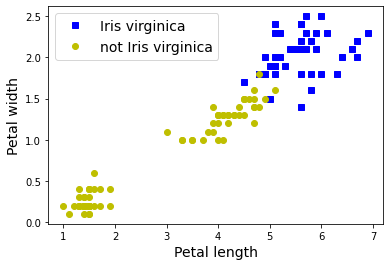

In [9]:
plt.plot(train_X[:, 0][train_y==1], train_X[:, 1][train_y==1], "bs",label="Iris virginica")
plt.plot(train_X[:, 0][train_y==0], train_X[:, 1][train_y==0], "yo",label="not Iris virginica")
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [10]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [11]:
clf.fit(train_X, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [20]:
y_pred = clf.predict(test_X)

In [14]:
clf.decision_function(test_X)

array([-1.1078307 , -0.47776589, -1.0879643 ,  1.72780057,  1.05061727,
        0.29941802, -1.7446617 , -1.0393112 , -0.26278287, -0.88755861,
       -0.55695226, -0.88755861,  1.52395797,  1.69359413, -1.27990468,
       -1.1078307 , -1.04318333, -1.25287223, -1.10861255, -1.14950288,
       -1.07619502, -1.17032737,  1.56951261, -1.36728539,  1.05061727,
        1.15827806, -1.1078307 , -1.91872037, -1.09819145, -1.1078307 ])

畫結果 https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python

使用plt.contourf畫分類結果，但是因為Contour levels must be increasing，所以要進行畫圖前準備。

In [16]:
def plot_predictions(clf,X): #兩個feature 的情況
    x0s = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    x1s = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    # np.c_: Translates slice objects to concatenation along the second axis.
    XX = np.c_[x0.ravel(), x1.ravel()]
    Z = clf.predict(XX)
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z, cmap=plt.cm.brg, alpha=0.2)

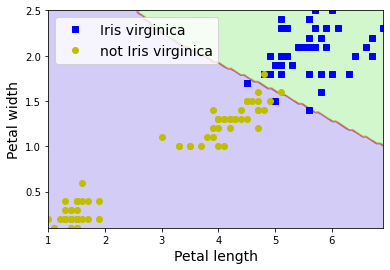

In [17]:
plt.plot(train_X[:, 0][train_y==1], train_X[:, 1][train_y==1], "bs",label="Iris virginica")
plt.plot(train_X[:, 0][train_y==0], train_X[:, 1][train_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,train_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

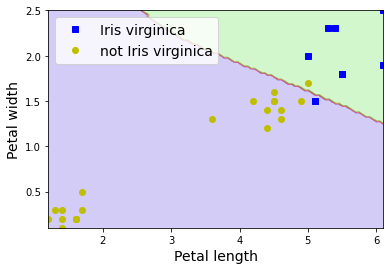

In [21]:
plt.plot(test_X[:, 0][test_y==1], test_X[:, 1][test_y==1], "bs",label="Iris virginica")
plt.plot(test_X[:, 0][test_y==0], test_X[:, 1][test_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,test_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

衡量結果

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print(confusion_matrix(clf.predict(test_X),test_y))

[[21  1]
 [ 1  7]]


In [ ]:
train_accuracy = sum(y_pred == test_y)/len(y_pred)

In [24]:
test_accuracy = sum(y_pred == test_y)/len(y_pred)

In [25]:
test_accuracy

0.9333333333333333

嘗試不同參數

SVC的kernel function 預設為rbf (radial basis function)，我們看看其他的kernel function

In [26]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

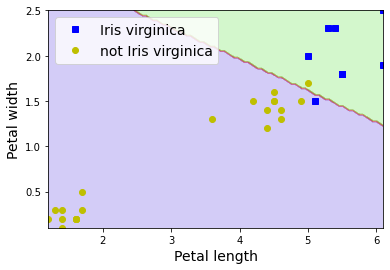

In [27]:
plt.plot(test_X[:, 0][test_y==1], test_X[:, 1][test_y==1], "bs",label="Iris virginica")
plt.plot(test_X[:, 0][test_y==0], test_X[:, 1][test_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,test_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [28]:
test_accuracy = sum(y_pred == test_y)/len(y_pred)
print(test_accuracy)

0.9333333333333333


kernel = polynomial with degree 3

In [29]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

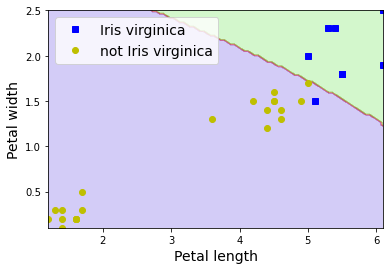

In [30]:
plt.plot(test_X[:, 0][test_y==1], test_X[:, 1][test_y==1], "bs",label="Iris virginica")
plt.plot(test_X[:, 0][test_y==0], test_X[:, 1][test_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,test_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [31]:
test_accuracy = sum(y_pred == test_y)/len(y_pred)
print(test_accuracy)

0.9666666666666667


kernel = sigmoid

In [32]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'sigmoid'))
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

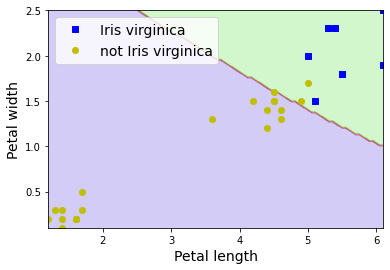

In [33]:
plt.plot(test_X[:, 0][test_y==1], test_X[:, 1][test_y==1], "bs",label="Iris virginica")
plt.plot(test_X[:, 0][test_y==0], test_X[:, 1][test_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,test_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [34]:
test_accuracy = sum(y_pred == test_y)/len(y_pred)
print(test_accuracy)

0.9333333333333333


用subplot

# Method2: Linear SVC

scikit-learn程式在LinearSVC跟SVC使用不同來源之程式：<br>
SVC 程式來自於libSVM <br>
LinearSVC 程式來自於liblinear <br>

差別處：<br>
1. LinearSVC使用線性kernel， 無法指定其他kernel <br>
2. libSVM適合處理中小型資料集，可以對於結構複雜的中小型資料給定非線性的kernel進行SVM<br>
3. liblinear 適合處理大型資料集，因為某些情況下，大型資料有沒有進行非線性轉換的分類結果差不多，在這樣的情況下，使用線性的kernel計算較快。<br>
4. 即使將SVC的kernel設定為linear，計算速度仍比LinearSVC慢。
5. 計算複雜度：<br>
SVC：$O(mn^2)$至$O(mn^3)$, $n$為資料數 $m$為特徵數 <br>
LinearSVC : $O(mn)$

LinearSVC 在模型以及參數指定較為複雜，我們一一來看：<br>
原問題：
$$\min_{w,b} \,\text{權重正則化項} + C\sum_{i=1}^{n} \text{L1 or L2 hinge loss}$$

程式參數`penalty` = {'l1','l2'}：決定權重使用L1 或是 L2 正則化，預設為'l2'<br>
程式參數`loss` = {'hinge', 'squared_hinge'}： 決定要用L1 或是L2 hinge loss，預設為$\textbf{'squared_hinge'}$

舉例：L1 penalty with L2 hinge loss:<br>
$$\min_{w,b} \, \lVert w \rVert + C\sum_{i=1}^{n} \Big(max\big(0,1-y_i(w^T\phi(x_i)+b)\big)\Big)^2$$ <br>
L2 penalty with L1 hinge loss:<br>
$$\min_{w,b} \, \frac{1}{2}w^Tw + C\sum_{i=1}^{n} max\big(0,1-y_i(w^T\phi(x_i)+b)\big)$$ 

通常會調整的參數為：<br>
1. C (懲罰程度) 剛開始train時通常不動這個<br> 
2. penalty (權重的正則化要用哪個)
3. loss(loss funciton要用哪個)

In [35]:
from sklearn.svm import LinearSVC

In [36]:
clf = make_pipeline(StandardScaler(), LinearSVC())
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

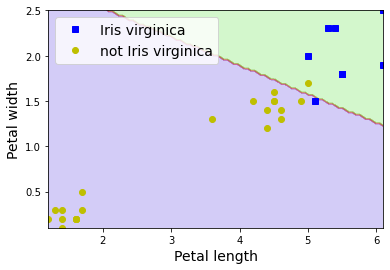

In [37]:
plt.plot(test_X[:, 0][test_y==1], test_X[:, 1][test_y==1], "bs",label="Iris virginica")
plt.plot(test_X[:, 0][test_y==0], test_X[:, 1][test_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,test_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [38]:
test_accuracy = sum(y_pred == test_y)/len(y_pred)
print(test_accuracy)

0.9333333333333333


# Method3 : NuSVC

相較於SVC 用C來控制邊界，如果我們討論以下形式：<br>
$$\begin{align*}
\min_{w,b,\xi,\rho} \,&\frac{1}{2}w^Tw -\nu\rho + \frac{1}{n}\sum_{i=1}^{n}\xi_i   \\
\text{subject to } &y_i(w^T\phi(x_i)+b)\geq \rho-\xi_i,\\
&\xi_i\geq 0 , i=1,...,n\\
&\rho \geq 0
\end{align*}$$

$\nu$ 為$(0,1]$之間的數值，其被證明為$\textbf{分類錯誤的樣本數所佔比例之上界}$，也同時是$\textbf{支撐向量所佔比例之下界}$

參數跟SVC差別只在於C換成$\nu$

通常會調整的參數為：<br>
1. $\nu$ 預設為0.5 剛開始train時通常不動這個<br>
2. kernel (kernel funciton 要用哪個)
3. kernel function相對應的參數，剛開始train時通常不動這個 

In [39]:
from sklearn.svm import NuSVC

In [40]:
clf = make_pipeline(StandardScaler(), NuSVC())
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

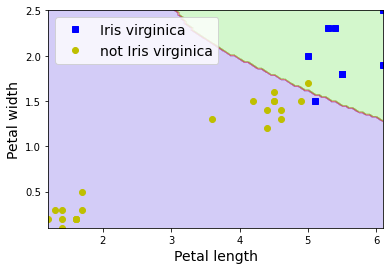

In [41]:
plt.plot(test_X[:, 0][test_y==1], test_X[:, 1][test_y==1], "bs",label="Iris virginica")
plt.plot(test_X[:, 0][test_y==0], test_X[:, 1][test_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,test_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [42]:
test_accuracy = sum(y_pred == test_y)/len(y_pred)
print(test_accuracy)

0.9333333333333333


In [43]:
clf = make_pipeline(StandardScaler(), NuSVC(kernel = 'poly'))
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

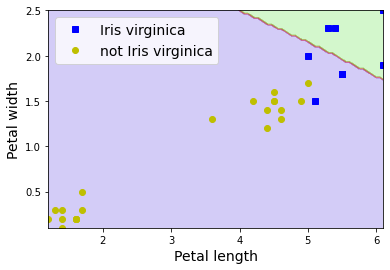

In [44]:
plt.plot(test_X[:, 0][test_y==1], test_X[:, 1][test_y==1], "bs",label="Iris virginica")
plt.plot(test_X[:, 0][test_y==0], test_X[:, 1][test_y==0], "yo",label="not Iris virginica")
plot_predictions(clf,test_X)
plt.xlabel('Petal length',fontsize=14)
plt.ylabel('Petal width',fontsize=14)
plt.legend(loc="upper left", fontsize=14)

In [45]:
test_accuracy = sum(y_pred == test_y)/len(y_pred)
print(test_accuracy)

0.8666666666666667
